## This notebook is based on a series of tutorials/examples availble in the main redback repo. 

You will need to install Redback. Instructions available at https://redback.readthedocs.io/en/latest/. I suggest installing from source via GitHub but you can also install via pip.

The specific examples in the main repo that this tutorial is based off are
- simulate basic transient 
- simulate kilonova
- ToO simulations with redback 
- simulate single transient in rubin 
- simulate survey

In [4]:
import redback 
import numpy as np
import pandas as pd
from redback.simulate_transients import SimulateOpticalTransient, SimulateGenericTransient, SimulateFullOpticalSurvey
import matplotlib.pyplot as plt
import bilby
%matplotlib inline

### You should be using redback version 1.02 or above. If no version info is printed when you first import redback you need to update redback. 

Let's first start with something basic. As all redback models are callable functions, we can just call the model on an abitrary time array with some other inputs, add some noise and call it 'simulated data'. 

For the purposes of this tutorial we will mostly use a simple kilonova or afterglow model. But note that any model implemented in redback will work exactly the same way. And when we start using the simulation module users could also pass in their own function

In [15]:
model = 'tophat' 

# Lets set up the function of this model, we could import it directly (as we import e.g., pandas)
# but we have a more convenient option provided by redback

function = redback.model_library.all_models_dict[model]

# This now has the function behind the model. Let's inpsect what it requires. 
# We are using jupyter so this is easy. We could also look at the API DOCS

In [16]:
function?

If we need more information, we can look at the paper that describes the model. This is conveniently available via

In [17]:
function.citation

'https://ui.adsabs.harvard.edu/abs/2020ApJ...896..166R/abstract'

Text(0.5, 0, 'time (d)')

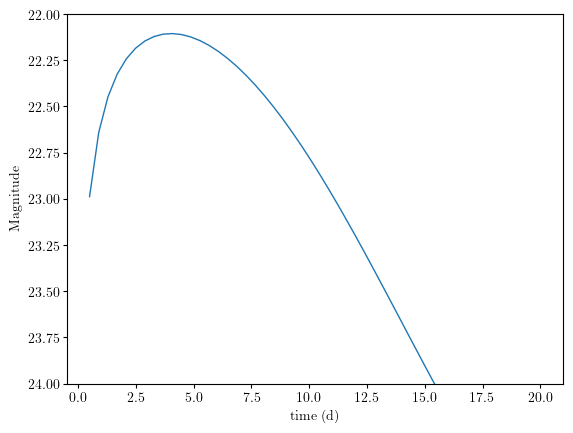

In [22]:
model = 'one_component_kilonova_model' 
function = redback.model_library.all_models_dict[model]

# evaluate this model on a time array
tt = np.linspace(0.5, 20, 50)

# define other parameters required by the model 
redshift = 0.01
mej = 0.04
vej = 0.25
kappa = 10

# Define other kwargs required by the model. 
# These could be passed together in a dictionary that is unpacked.

kwargs = {}
kwargs['output_format'] = 'magnitude'
kwargs['bands'] = 'lsstg'

mags = function(tt, redshift=redshift, mej=mej, vej=vej, kappa=kappa, **kwargs)

plt.plot(tt, mags)
plt.ylim(24, 22)
plt.ylabel('Magnitude')
plt.xlabel('time (d)')

We can take random slices of this output, add noise and voila we have some 'simulated data'. In the simulation module we streamline this generic transient simulation interface a fair bit. 

In [30]:
# Let's set up the parameters of our model
# We will use the one_component_kilonova_model implemented in redback but any optical model in Redback will work.
bands = ['lsstg', 'lsstr', 'lssti']
times = np.linspace(0.2, 10, 20) # days
model_kwargs = {'bands':bands, 'output_format':'magnitude'}
num_of_data_points = 40 # the number of data points to generate
parameters = {}
parameters['mej'] = 0.05
parameters['redshift'] = 0.01
parameters['temperature_floor'] = 3000
parameters['kappa'] = 1
parameters['vej'] = 0.2
kn_obs = SimulateGenericTransient(model='one_component_kilonova_model', parameters=parameters,
                                  times=times, data_points=num_of_data_points, model_kwargs=model_kwargs,
                                  multiwavelength_transient=True, noise_term=0.02)

We can save this data too 

In [31]:
kn_obs.save_transient('AT2024ggha')

This returns a kn_obs object which has a bunch of attributes. Let's look at the data

In [32]:
kn_obs.data

,time,band,true_output,output,output_error
0,0.200000,lssti,20.400056,20.246519,0.408001
1,0.200000,lsstr,20.300438,20.105660,0.406009
2,0.200000,lsstg,20.309982,20.451871,0.406200
3,0.715789,lssti,18.982645,18.963839,0.379653
4,0.715789,lssti,18.982645,18.838371,0.379653
5,1.231579,lsstr,18.933235,18.888363,0.378665
6,1.747368,lssti,18.601587,18.607018,0.372032
7,2.263158,lsstg,20.471961,20.290317,0.409439
8,2.263158,lssti,18.751512,18.709588,0.375030
9,2.778947,lsstg,21.156545,21.243033,0.423131


14:44 redback WARNING : [Errno 2] No such file or directory: 'kilonova//my_kilonova_metadata.csv'
14:44 redback WARNING : Setting metadata to None. This is not an error, but a warning that no metadata could be found online.


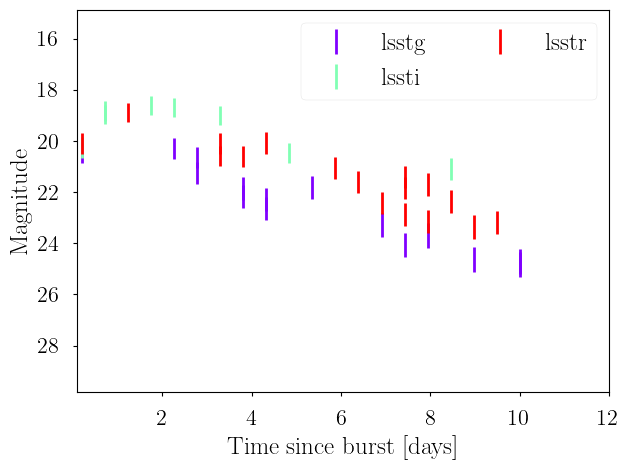

In [33]:
# But why print when you can load this up into a redback transient and plot.
kilonova = redback.transient.Kilonova(name='my_kilonova', magnitude=kn_obs.data['output'].values,
                                      time=kn_obs.data['time'].values, data_mode='magnitude',
                                      magnitude_err=kn_obs.data['output_error'].values, bands=kn_obs.data['band'].values)
kilonova.plot_data()
plt.show()

With the kilonova object set up, you can do inference on this data the exact same way as you would for any other transient.

## That was a very generic interface. Let's make it a bit more realistic. And consider a telescope/limiting magnitudes/etc

We first design a strategy. This takes the form of a dataframe which specifies sky pointings, time, limiting mags, and the bands

In [37]:
# specify the number of pointings per band 
num_obs = {'lsstg': 10, 'lsstr':10, 'lssti':10, 'lsstz':10, 'lsstu':10}

# specify the cadence in days for each band
average_cadence = {'lsstg': 1.5, 'lsstr': 5.0, 'lssti': 2.5, 'lsstz':1, 'lsstu':1}

# specify any scatter on the cadence, the time of the observation will be 
# taken from a Gaussian with the scatter as sigma
cadence_scatter = {'lsstg': 0.5, 'lsstr':0.5, 'lssti':0.5, 'lsstz':1, 'lsstu':1}

# Specify limiting 5 sigma depth magnitude
limiting_magnitudes = {'lsstg': 25.0, 'lsstr': 24.5, 'lssti': 23.0, 'lsstu':25, 'lsstz':23}

# We now use redback to make a pointings table from the above information
# We set RA and DEC to always be at the location of the transient 
# but we can change this to incorporate the fov/full survey
ra = 1.0 
dec = 1.5
# We also set the start time of the observation/survey strategy 
initMJD = 59581.0
pointings = redback.simulate_transients.make_pointing_table_from_average_cadence(
    ra=ra, dec=dec, num_obs=num_obs, average_cadence=average_cadence,
    cadence_scatter=cadence_scatter, limiting_magnitudes=limiting_magnitudes, 
    initMJD=initMJD)
print(pointings)

         expMJD  _ra  _dec filter  fiveSigmaDepth
0  59581.078907  1.0   1.5  lsstz            23.0
0  59582.521941  1.0   1.5  lsstg            25.0
0  59583.113984  1.0   1.5  lssti            23.0
0  59583.379323  1.0   1.5  lsstu            25.0
1  59583.889047  1.0   1.5  lsstg            25.0
1  59584.208610  1.0   1.5  lsstz            23.0
1  59585.001804  1.0   1.5  lsstu            25.0
1  59585.407349  1.0   1.5  lssti            23.0
2  59585.502525  1.0   1.5  lsstz            23.0
2  59585.571265  1.0   1.5  lsstg            25.0
2  59585.861033  1.0   1.5  lsstu            25.0
0  59585.988696  1.0   1.5  lsstr            24.5
3  59586.322604  1.0   1.5  lsstz            23.0
4  59586.722110  1.0   1.5  lsstz            23.0
3  59587.074164  1.0   1.5  lsstg            25.0
3  59587.152219  1.0   1.5  lsstu            25.0
4  59588.022875  1.0   1.5  lsstg            25.0
2  59588.232984  1.0   1.5  lssti            23.0
4  59588.275635  1.0   1.5  lsstu            25.0


Note in the above we have made all the pointings at _ra and _dec to be the same place. 

We can make these different and let the telescope FOV to dictate if the 'transient' would be detected or not. 

The pointings are just a dataframe with the specific columns shown above. You could just as easily make your own up or read a table from somewhere else. The above is just meant to be a helpful function to make these pointings

In [45]:
model_kwargs = {}
# Any redback model can be referred to as a string. 
# If the user has their own model, they can pass a function here instead. 
# There are over a 100 models implemented in redback, lots of models for kilonovae, GRB afterglows, 
# supernovae, TDEs and other things
model = 'one_component_kilonova'
# Load the default prior for this model in redback and sample from it to get 1 set of parameters. 
# We can sample from the default prior for this model for a random kilonova. 
parameters = redback.priors.get_priors(model=model).sample()

# We fix a few parameters here to create a nice looking kilonova. 
# You can change any of the parameters here or add additional keyword arguments 
# to change some physical assumptions. Please refer to the documentation for this and units etc
parameters['mej'] = 0.05
parameters['t0_mjd_transient'] = 59582.0
parameters['redshift'] = 0.02
parameters['t0'] = parameters['t0_mjd_transient']
parameters['temperature_floor'] = 3000
parameters['kappa'] = 1
parameters['vej'] = 0.2
parameters['ra'] = 1.0
parameters['dec'] = 1.5
print(parameters)

14:53 redback WARNING : [Errno 2] No such file or directory: '/Users/nikhil/Documents/postdoc/redback/redback/priors/one_component_kilonova.prior'
14:53 redback WARNING : Returning empty PriorDict.


{'mej': 0.05, 't0_mjd_transient': 59582.0, 'redshift': 0.02, 't0': 59582.0, 'temperature_floor': 3000, 'kappa': 1, 'vej': 0.2, 'ra': 1.0, 'dec': 1.5}


In [46]:
# Specify some additional settings. 
# A threshold for data points to consider detections based on a SNR. 
snr_threshold = 5.0

# A maximum time to evaluate the transient, 
# this is useful if you do not trust the model past a certain time or do not want to generate detections past this time. 
end_transient_time = 20

# Simulate by passing in the parameters of the model, the model string (or a python function), 
# and the pointings generated above.
kn_sim = SimulateOpticalTransient.simulate_transient(model='one_component_kilonova_model',
                                       parameters=parameters, pointings_database=pointings,
                                       survey=None, model_kwargs=model_kwargs,
                                        end_transient_time=end_transient_time, snr_threshold=snr_threshold)

14:53 redback INFO    : Using the supplied as the pointing database.


In [47]:
# We can print the observations that were simulated to see what the data looks like. 
# This will include extra stuff like non-detections etc
print(kn_sim.observations)

            time  magnitude  e_magnitude   band system  flux_density(mjy)   
0   59581.078907  24.217034          NaN  lsstz     AB       1.766565e-15  \
1   59582.521941  21.162627     0.006382  lsstg     AB       1.235434e-02   
2   59583.113984  20.222857     0.016720  lssti     AB       2.975296e-02   
3   59583.379323  22.513807     0.022238  lsstu     AB       3.545425e-03   
4   59583.889047  21.630166     0.009722  lsstg     AB       8.109461e-03   
5   59584.208610  19.960038     0.013372  lsstz     AB       3.719992e-02   
6   59585.001804  25.084820     0.339427  lsstu     AB       2.322779e-04   
7   59585.407349  21.004746     0.033863  lssti     AB       1.469029e-02   
8   59585.502525  20.505726     0.022537  lsstz     AB       2.207314e-02   
9   59585.571265  23.366788     0.052510  lsstg     AB       1.501448e-03   
10  59585.861033  26.444881     0.623594  lsstu     AB       1.264306e-04   
11  59585.988696  22.073040     0.023123  lsstr     AB       5.403977e-03   

In [48]:
# We can also save the observations to a file using the save_transient method.
# This will save the observations to a csv file in a 'simulated' directory alongside the csv file
# specifying the injection parameters.
kn_sim.save_transient(name='my_kilonova')

14:53 redback WARNING : [Errno 2] No such file or directory: 'kilonova//my_kilonova_metadata.csv'
14:53 redback WARNING : Setting metadata to None. This is not an error, but a warning that no metadata could be found online.


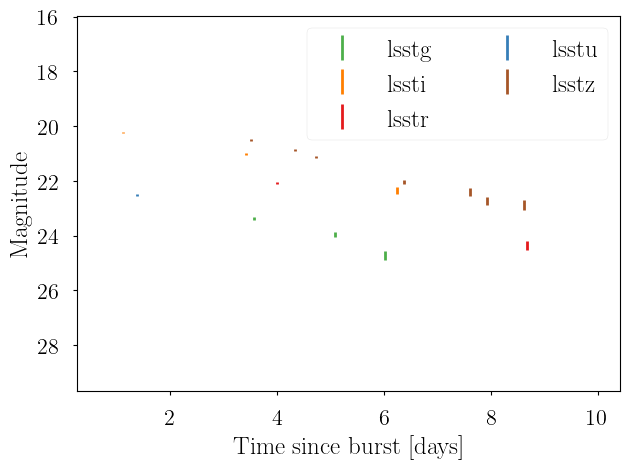

In [49]:
# We can load this transient object directly into redback via a convenience function

kn_object = redback.transient.Kilonova.from_simulated_optical_data(name='my_kilonova', data_mode='magnitude')

# Make a dictionary for colors on the plot
band_colors = {'lsstg':'#4daf4a', 'lsstu':'#377eb8', 'lsstr':'#e41a1c', 
               'lsstz':'#a65628', 'lssti':'#ff7f00'}
ax = kn_object.plot_data(show=False, band_colors=band_colors)

The above plot only shows the detection and not the input lightcurve or non-detections. Let's add those in. As the axes is returned with can use the attributes stored in the kn_sim object directly.

(0.1, 10.0)

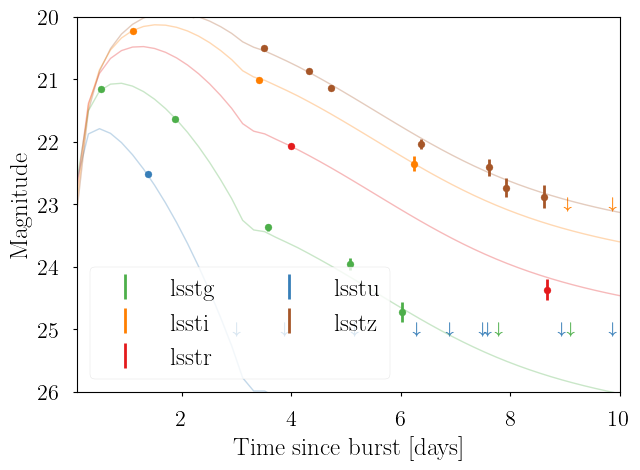

In [51]:
# Make a dictionary for colors on the plot
band_colors = {'lsstg':'#4daf4a', 'lsstu':'#377eb8', 'lsstr':'#e41a1c', 
               'lsstz':'#a65628', 'lssti':'#ff7f00'}
ax = kn_object.plot_data(show=False, band_colors=band_colors)
ax.set_ylim(26, 20)
upper_limits = kn_sim.observations[kn_sim.observations['detected'] != 1.0]
data = kn_sim.observations[kn_sim.observations['detected'] == 1.0]
for band in band_colors.keys():
    up = upper_limits[upper_limits['band'] == band]
    dd = data[data['band'] == band]
    plt.scatter(dd['time (days)'], dd['magnitude'], s=100, marker='.', color=band_colors[band])
    plt.scatter(up['time (days)'], up['limiting_magnitude'], s=100, marker=r'$\downarrow$', color=band_colors[band])

    
# We can also plot the true data 
tt = np.linspace(0.1, 20, 100)
# specify output_format 
parameters['output_format'] = 'magnitude'
for band in band_colors.keys():
    parameters['bands'] = band
    out = redback.transient_models.kilonova_models.one_component_kilonova_model(tt, **parameters)
    plt.plot(tt, out, color=band_colors[band], alpha=0.3)

plt.xlim(0.1, 10)



By changing the pointing table (which is just a dataframe you could create from elsewhere) you can change the 'follow-up/survey strategy'

## Now let's take the last step and simulate a lightcurve for Rubin/ZTF (both of which are directly implemented in redback, in terms of the telescope FOV/pointing table). 

In [55]:
model_kwargs = {}
# Load the default prior for this model in redback and sample from it to get 1 set of parameters.
# We fix a few parameters here to create a nice looking kilonova
parameters = redback.priors.get_priors(model='one_component_kilonova_model').sample()
parameters['mej'] = 0.05
parameters['t0_mjd_transient'] = 60250
parameters['redshift'] = 0.01
parameters['t0'] = parameters['t0_mjd_transient']
parameters['temperature_floor'] = 3000
parameters['kappa'] = 1
parameters['vej'] = 0.2

# We also can place the transient on the sky by setting the ra and dec parameters.
# This will be randomly set from the pointing if not given.
parameters['ra'] = 1.0
parameters['dec'] = -0.5

# We now simulate a kilonova using the SimulateOpticalTransient class.
# Now specifying a survey string, which will load the pointings table from the tables directory in redback.
# These tables will need to be downloaded from zenodo using the redback.utils if not already present.
# Please look at the documentation for more details.
kn_sim = SimulateOpticalTransient.simulate_transient_in_rubin(model='one_component_kilonova_model',
                                                              survey='Rubin_10yr_baseline',
                                                              parameters=parameters, model_kwargs=model_kwargs,
                                                              end_transient_time=10., snr_threshold=5.)

14:58 redback INFO    : Using rubin_baseline_v3.0_10yrs.tar.gz as the pointing database corresponding to Rubin_10yr_baseline.


14:58 redback WARNING : [Errno 2] No such file or directory: 'kilonova//my_kilonova_metadata.csv'
14:58 redback WARNING : Setting metadata to None. This is not an error, but a warning that no metadata could be found online.


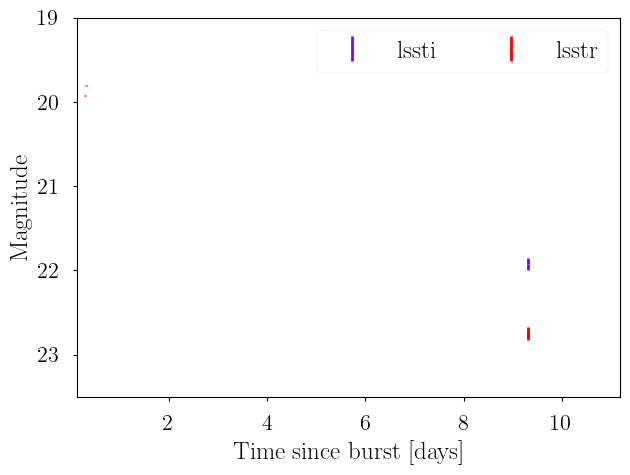

In [56]:
kn_sim.save_transient(name='my_kilonova')

# We can now load the data into a transient object for plotting and other tasks such as inference.
# Note that this will only the 'detected' data points. The user can add the non-detections back in if they wish.
kn_object = redback.transient.Kilonova.from_simulated_optical_data(name='my_kilonova', data_mode='magnitude')
ax = kn_object.plot_data(show=False)
ax.set_ylim(23.5, 19)
plt.show()

Again, let's create a plot with the non-detections etc 

(-2.0, 15.0)

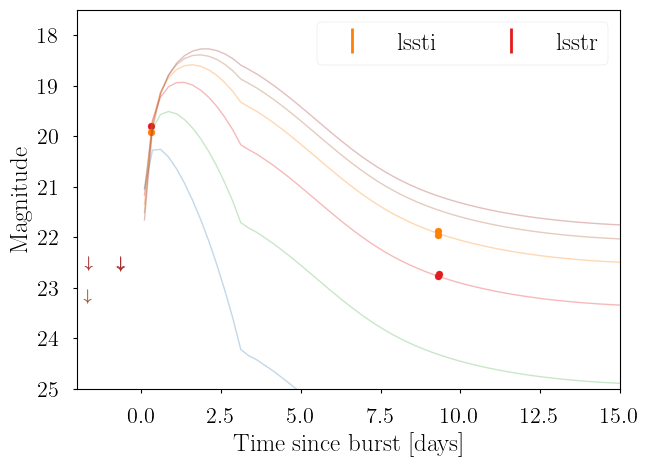

In [82]:
# Make a dictionary for colors on the plot
band_colors = {'lsstg':'#4daf4a', 'lsstu':'#377eb8', 'lsstr':'#e41a1c', 
               'lsstz':'#a65628', 'lssti':'#ff7f00', 'lssty':'brown'}
ax = kn_object.plot_data(show=False, band_colors=band_colors)
ax.set_ylim(25, 17.5)
upper_limits = kn_sim.observations[kn_sim.observations['detected'] != 1.0]
data = kn_sim.observations[kn_sim.observations['detected'] == 1.0]
for band in band_colors.keys():
    up = upper_limits[upper_limits['band'] == band]
    dd = data[data['band'] == band]
    plt.scatter(dd['time (days)'], dd['magnitude'].values, s=100, marker='.', color=band_colors[band])
    plt.scatter(up['time (days)'], up['limiting_magnitude'].values, s=100, marker=r'$\downarrow$', color=band_colors[band])

    
# We can also plot the true data 
tt = np.linspace(0.1, 25, 100)
# specify output_format 
parameters['output_format'] = 'magnitude'
for band in band_colors.keys():
    parameters['bands'] = band
    out = redback.transient_models.kilonova_models.one_component_kilonova_model(tt, **parameters)
    plt.plot(tt, out, color=band_colors[band], alpha=0.3)

plt.xlim(-2, 15)

## What if you want to simulate for a survey that redback does not have implemented?

You can call the class directory and set up things like a pointings table, survey FOV etc. Please look at the documentation.
 
Only circular fov's are currently implemented in redback. This is definitely an extension we want to make.

# Simulating a full survey.

The above showed how to generate lightcurves for one single transient. What about doing a full survey? 

In [103]:
# We now set up the parameters for the kilonova population. A full survey simulation requires a prior and a rate.
rate = 30 #Gpc^-3 yr^-1

# We now need to specify a prior for the source to follow. Let's use the default prior.
prior = redback.priors.get_priors(model='one_component_kilonova_model')

# Specify settings of the survey. 
survey_start_date = 58288 #MJD
survey_duration = 1 #years

This will place sources uniformly in source frame out to a maximum distance 
set by the prior on the redshift and isotropically on the sky, and drawn in time following the rate above. 
Then see for all transients that occur whether the survey specified (by the pointing table/fov/settings) can make any detections 



In [104]:
kn_survey = SimulateFullOpticalSurvey(model='one_component_kilonova_model', survey='ztf',
                                      rate=rate, prior=prior,end_transient_time=15., snr_threshold=5.,
                                      survey_fov_sqdeg=36, survey_start_date=survey_start_date,
                                      survey_duration=survey_duration, model_kwargs={})

16:15 redback INFO    : Using ztf.tar.gz as the pointing database corresponding to ztf.


The full survey simulation returns a kn_survey object which includes the properties of all events and the detections etc. This can be saved via 

In [105]:
kn_survey.save_survey(survey='my_survey')

In [112]:
#let's check the parameters of the simulated kilonovae
print('Number of kilonovae in survey volume = {}'.format(kn_survey.number_of_events))
print(kn_survey.parameters)

Number of kilonovae in survey volume = 17
    redshift       mej       vej      kappa  temperature_floor        ra   
0   0.075887  0.010901  0.480922  20.972761        2879.307118  5.182519  \
1   0.093083  0.046735  0.410562  13.363592         213.966803  6.091693   
2   0.049433  0.022925  0.383307  23.882352        1720.841698  3.767875   
3   0.017906  0.042836  0.201410  29.850724         417.979472  0.888811   
4   0.051968  0.027956  0.375310  22.149215        1314.732119  6.109391   
5   0.019607  0.034865  0.191542  17.752408        3065.079774  1.669848   
6   0.073763  0.034175  0.495558   5.684611         372.375082  3.044033   
7   0.078407  0.017165  0.496989  11.700151         105.740664  1.934444   
8   0.077244  0.026845  0.305609  13.912262         372.913903  1.418934   
9   0.069035  0.036672  0.495954  25.208027         258.115577  1.430663   
10  0.089794  0.048006  0.380621  20.064931        2030.737975  1.811180   
11  0.083908  0.026208  0.360729  10.246472   

We can quickly see if we produced any detections. The answer will be no...

In [130]:
for x in range(kn_survey.number_of_events):
    observations = len(kn_survey.list_of_observations[x])
    _detections = sum(kn_survey.list_of_observations[x]['detected'] == 1.)
    print("Event {} has {} detections out of {} observations".format(x, _detections, observations))

Event 0 has 0 detections out of 124 observations
Event 1 has 0 detections out of 0 observations
Event 2 has 0 detections out of 3 observations
Event 3 has 0 detections out of 0 observations
Event 4 has 0 detections out of 2 observations
Event 5 has 0 detections out of 0 observations
Event 6 has 0 detections out of 0 observations
Event 7 has 0 detections out of 2 observations
Event 8 has 0 detections out of 0 observations
Event 9 has 0 detections out of 26 observations
Event 10 has 0 detections out of 29 observations
Event 11 has 0 detections out of 0 observations
Event 12 has 0 detections out of 0 observations
Event 13 has 0 detections out of 1 observations
Event 14 has 0 detections out of 4 observations
Event 15 has 0 detections out of 0 observations
Event 16 has 0 detections out of 0 observations


### That's quite sad. So how about I show how to simulate a transient population that would definitely produce detections in a survey instead.

In [5]:
prior = redback.priors.get_priors(model='one_component_kilonova_model')

# Let's change the redshift prior to ensure we get some bright kilonovae.
prior['redshift'] = bilby.core.prior.Uniform(0.002, 0.005, 'redshift', latex_label='$z$')
# We can now sample from the prior to get a set of parameters for a kilonova. Let's sample 5 events.
events = 5
parameters = prior.sample(events)
# For each kilonova we also need to provide a starting time. Let's keep this simple.
parameters['t0_mjd_transient'] = np.array([60260, 60280, 60290, 60360, 60320])

# We can also place the transient ourselves on the sky by setting the ra and dec parameters.
# For now we will let redback randomly place the transients from ra and dec that are covered by the Rubin survey pointings.
# Let's print all the values to be sure we are happy with them.
print(parameters)

{'redshift': array([0.00234833, 0.00481628, 0.00351675, 0.00271472, 0.00355759]), 'mej': array([0.04092758, 0.03230668, 0.03066487, 0.04466388, 0.02551935]), 'vej': array([0.19500222, 0.40748635, 0.22831493, 0.4838687 , 0.21328011]), 'kappa': array([12.86420518, 26.05799811, 18.71932281, 25.47273589, 16.48484498]), 'temperature_floor': array([ 826.29083298, 3750.39293867, 4110.99982413,  248.67296614,
       2625.19920709]), 't0_mjd_transient': array([60260, 60280, 60290, 60360, 60320])}


In [7]:
kn_sim = SimulateOpticalTransient.simulate_transient_population_in_rubin(model='one_component_kilonova_model',
                                                                        survey='Rubin_10yr_baseline',
                                                                        parameters=parameters, model_kwargs={},
                                                                        end_transient_time=10., snr_threshold=5.)
# We can print the observations that were simulated to see what the data looks like.
print(kn_sim.list_of_inference_observations)

# But why print when you can plot?
# First, let's save the observations to a file.
kn_sim.save_transient_population(transient_names=None)
# This will save the transient data to a csv file in the 'simulated' directory 
# alongside the csv file of the injection parameters.
# By default the name of the transient will be event_{}.csv where {} is the event number. 
# But you can also pass a list of names.

# Now we can create redback objects of each of these transients and then plot them.
# Note that this will only plot the 'detected' data points. 
# The user can add the non-detections back in if they wish.

09:51 redback INFO    : Using rubin_baseline_v3.0_10yrs.tar.gz as the pointing database corresponding to Rubin_10yr_baseline.


[Empty DataFrame
Columns: [time, magnitude, e_magnitude, band, system, flux_density(mjy), flux_density_error, flux(erg/cm2/s), flux_error, time (days), detected, limiting_magnitude]
Index: [],           time  magnitude  e_magnitude   band system  flux_density(mjy)   
4  60288.29215  20.705675     0.009056  lsstr     AB           0.019013  \
5  60288.31661  20.149984     0.013454  lssti     AB           0.031709   

   flux_density_error  flux(erg/cm2/s)    flux_error  time (days)  detected   
4            0.000159     1.792271e-14  1.499363e-16      8.29215       1.0  \
5            0.000393     1.976245e-14  2.455460e-16      8.31661       1.0   

   limiting_magnitude  
4           24.151993  
5           23.166829  ,            time  magnitude  e_magnitude   band system  flux_density(mjy)   
5  60291.119068  20.901275     0.005117  lsstg     AB           0.015804  \
6  60294.054418  19.036140     0.002982  lssti     AB           0.088407   
7  60298.058636  19.610103     0.007020  l

Let's plot the observations/non-detections for all these objects. Remember we can also load the data up into a transient object and use that directly too.

In [18]:
objects = []
for x in range(events):
    kne = redback.transient.Kilonova.from_simulated_optical_data(name='event_{}'.format(x), data_mode='magnitude')
    objects.append(kne)

09:57 redback WARNING : [Errno 2] No such file or directory: 'kilonova//event_0_metadata.csv'
09:57 redback WARNING : Setting metadata to None. This is not an error, but a warning that no metadata could be found online.
09:57 redback WARNING : [Errno 2] No such file or directory: 'kilonova//event_1_metadata.csv'
09:57 redback WARNING : Setting metadata to None. This is not an error, but a warning that no metadata could be found online.
09:57 redback WARNING : [Errno 2] No such file or directory: 'kilonova//event_2_metadata.csv'
09:57 redback WARNING : Setting metadata to None. This is not an error, but a warning that no metadata could be found online.
09:57 redback WARNING : [Errno 2] No such file or directory: 'kilonova//event_3_metadata.csv'
09:57 redback WARNING : Setting metadata to None. This is not an error, but a warning that no metadata could be found online.
09:57 redback WARNING : [Errno 2] No such file or directory: 'kilonova//event_4_metadata.csv'
09:57 redback WARNING : Se